In [1]:
import numpy as np  
from matplotlib import pyplot
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
import math # log function is inside this library
from sklearn import metrics

from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix, precision_recall_fscore_support, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb
import xgboost as xgb

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

import itertools
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn.model_selection import KFold
from sklearn import feature_extraction, model_selection, preprocessing
from sklearn.utils import resample

C:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


### Objective

To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 85% to 95% accuracy.

#### Import data

In [2]:
df_data_raw = pd.read_csv("concrete.csv")  

### Exploratory data quality report 

#### 1.	Univariate analysis

In [3]:
# initial inspection
df_data_raw.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


<b>Name -- Data Type -- Measurement -- Description</b><br>
•	Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
•	Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
•	Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
•	Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
•	Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
•	Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
•	Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable<br>
•	Age(age) -- quantitative -- Day (1~365) -- Input Variable<br>
•	Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable<br>


In [4]:
# data types

df_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Note:

1. All items are numeric.
2. There are eight independent variables (cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).
3. 1030 rows, 9 columns. Data types information are float type, except age which is integer. There are no null values in the data.

In [5]:
df_data_raw.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [6]:
# detail inspection
df_data_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


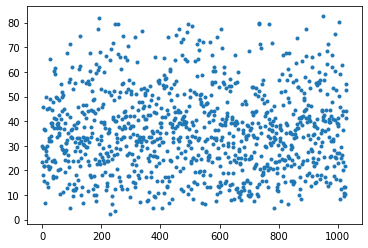

In [7]:
plt.plot(df_data_raw.strength,'.')

Shows sampeling did not introduce any bias into the dataset (the data is random)

In [11]:
column_list = df_data_raw.columns
cols = column_list.to_list()
cols

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age',
 'strength']

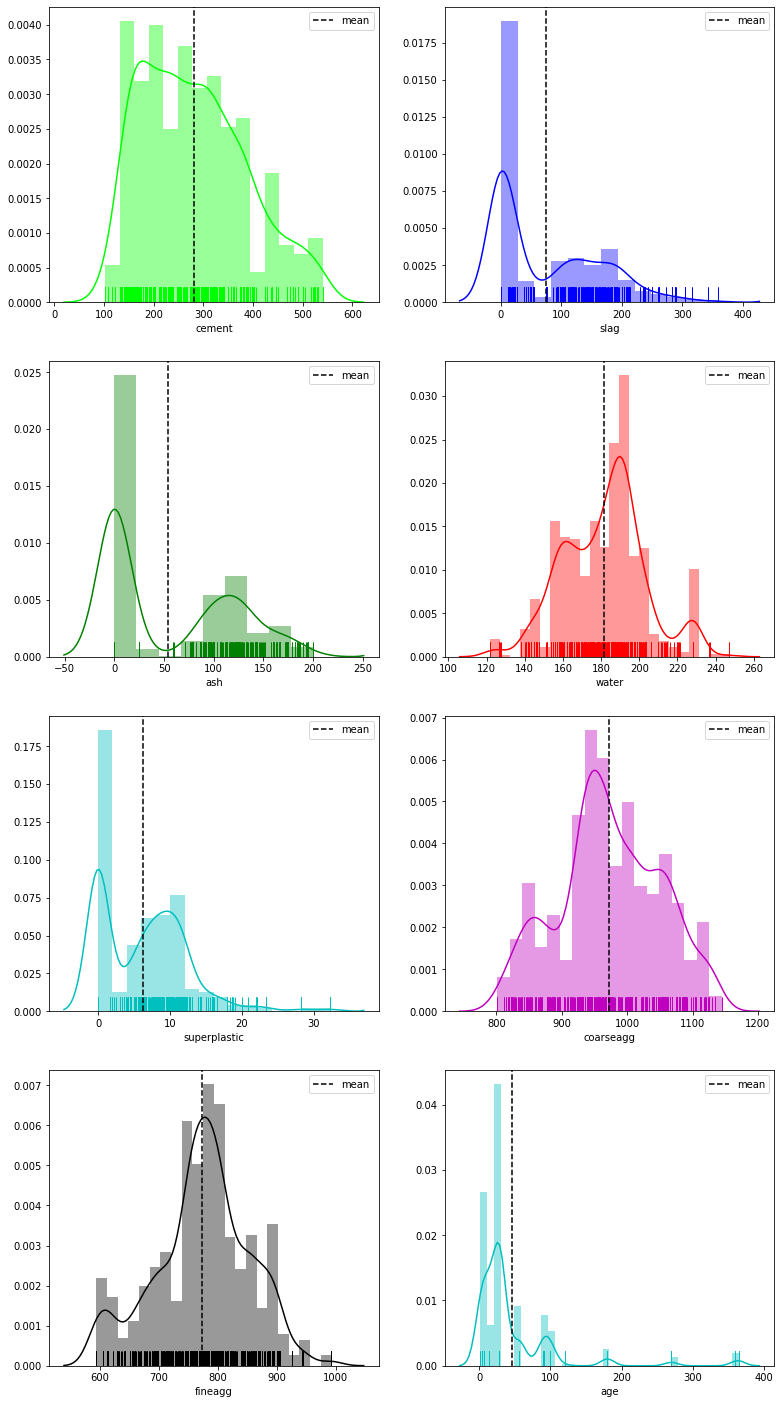

In [12]:
column_list = df_data_raw.columns
cols = column_list.to_list()
del cols[-1]


colors = ["lime","b","g","r","c","m","k","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(len(cols)),colors):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df_data_raw[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df_data_raw[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")

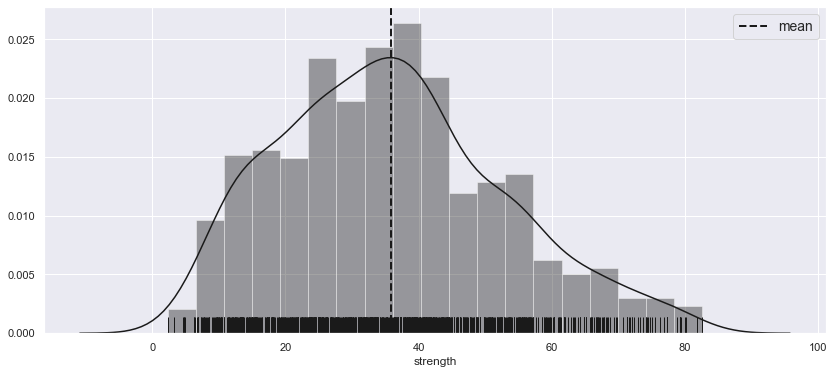

In [281]:
plt.figure(figsize=(14,6))
sns.distplot(df_data_raw["strength"],color="k",rug=True)
plt.axvline(df_data_raw["strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.show()

#### Comments: 

The distributions of age follows close to normal distributions, which is not unexpected. <br>
The distributions of fineagg and coarseagg follows close to normal distributions. <br>
The distributions of day follows something resembeling a normal distribution, but not quite. <br>
The distributions of the other features seem to be quite skewed. 

In [282]:
#Bin days to months
def days_to_months(data):
    if data["age"] <= 30:
        return "1 month"
    if data["age"] > 30 and data["age"] <= 60 :
        return "2 months"
    if data["age"] > 60 and data["age"] <= 90 :
        return "3 months"
    if data["age"] > 90 and data["age"] <= 120 :
        return "4 months"
    if data["age"] > 120 and data["age"] <= 150 :
        return "5 months"
    if data["age"] > 150 and data["age"] <= 180 :
        return "6 months"
    if data["age"] > 180 and data["age"] <= 210 :
        return "7 months"
    if data["age"] > 210 and data["age"] <= 240 :
        return "8 months"
    if data["age"] > 240 and data["age"] <= 270 :
        return "9 months"
    if data["age"] > 270 and data["age"] <= 300 :
        return "10 months"
    if data["age"] > 300 and data["age"] <= 330 :
        return "11 months"
    if data["age"] > 330 :
        return "12 months"


In [283]:
df_data_raw["age_months"] = df_data_raw.apply(lambda df_data_raw:days_to_months(df_data_raw) , axis=1)

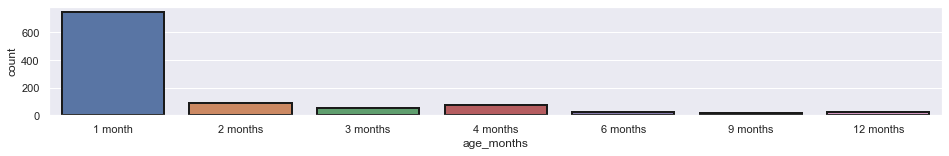

In [284]:
plt.figure(figsize=(16, 2))
order = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
ax = sns.countplot(df_data_raw["age_months"],
                   order=order,linewidth=2,
                   edgecolor = "k"*len(order))

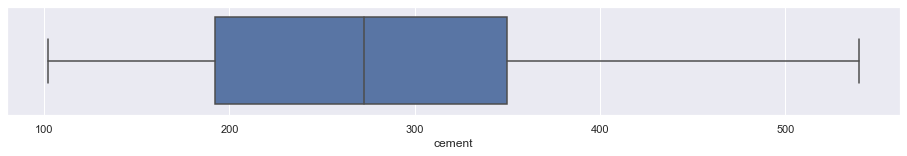

In [285]:
plt.figure(figsize=(16, 2))
sns.boxplot('cement',data=df_data_raw)

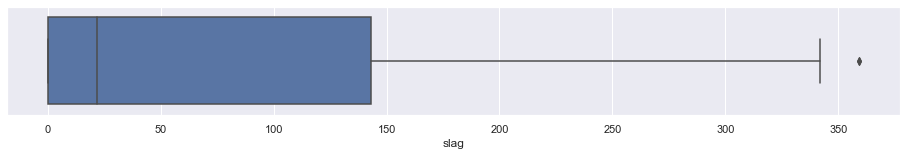

In [286]:
plt.figure(figsize=(16, 2))
sns.boxplot('slag',data=df_data_raw)

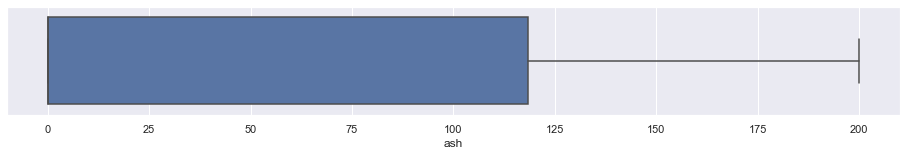

In [287]:
plt.figure(figsize=(16, 2))
sns.boxplot('ash',data=df_data_raw)

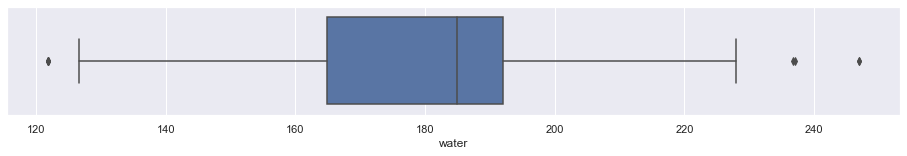

In [288]:
plt.figure(figsize=(16, 2))
sns.boxplot('water',data=df_data_raw)

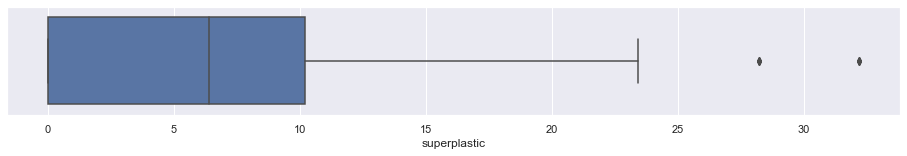

In [289]:
plt.figure(figsize=(16, 2))
sns.boxplot('superplastic',data=df_data_raw)

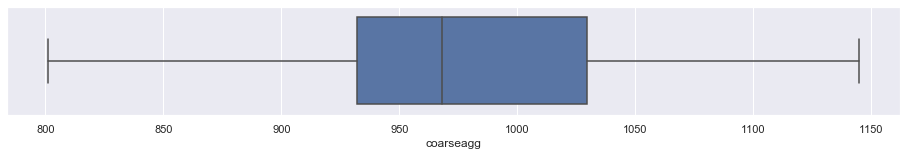

In [290]:
plt.figure(figsize=(16, 2))
sns.boxplot('coarseagg',data=df_data_raw)

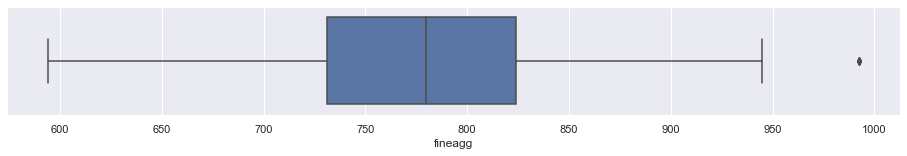

In [291]:
plt.figure(figsize=(16, 2))
sns.boxplot('fineagg',data=df_data_raw)

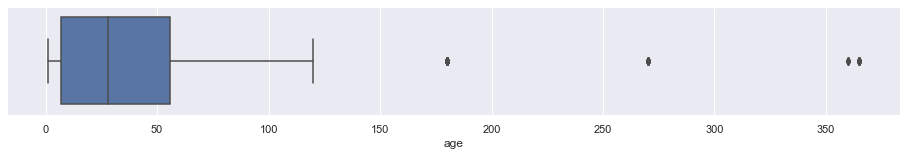

In [292]:
plt.figure(figsize=(16, 2))
sns.boxplot('age',data=df_data_raw)

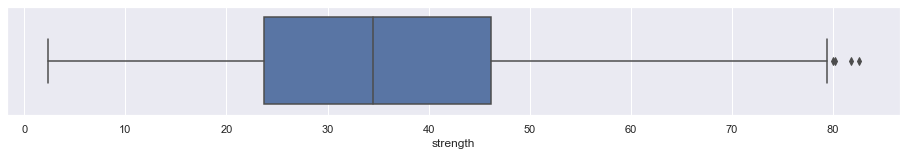

In [293]:
plt.figure(figsize=(16, 2))
sns.boxplot('strength',data=df_data_raw)

#### Swarm plot

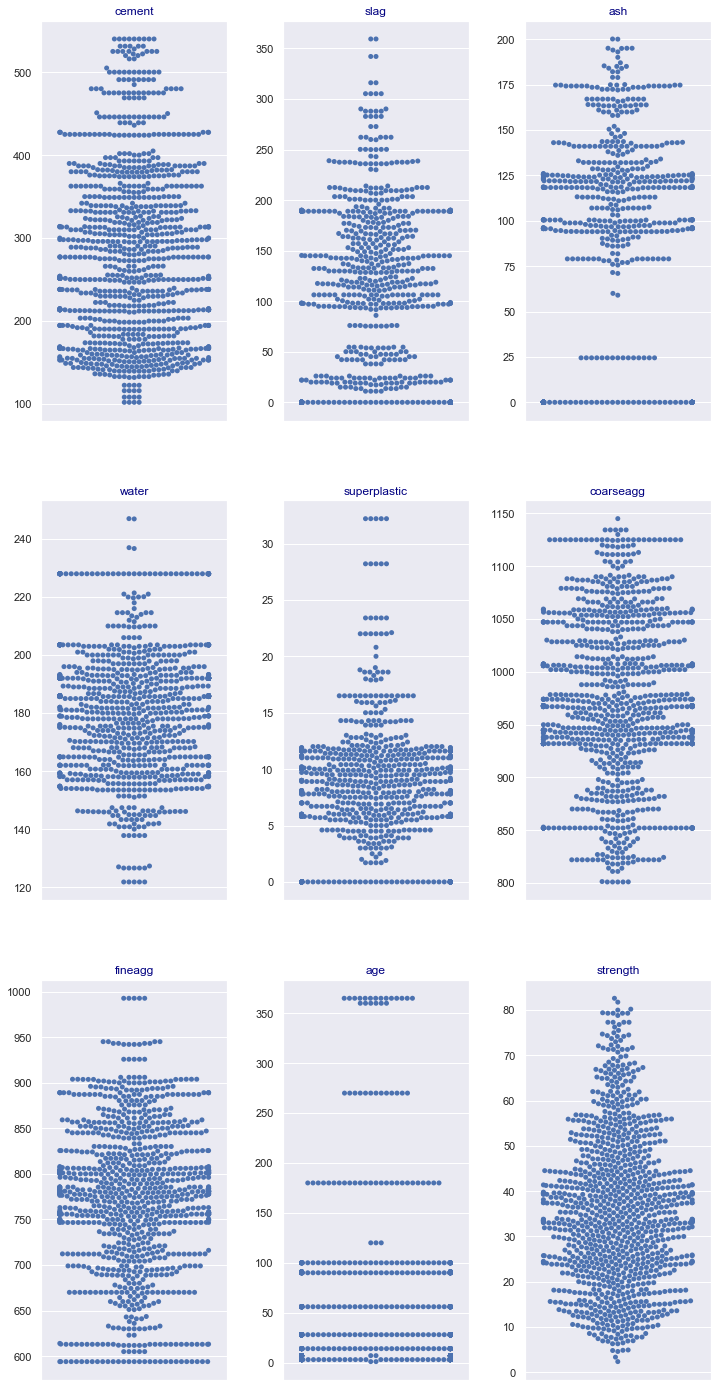

In [294]:
plt.figure(figsize=(12,25))

for i,j in itertools.zip_longest(column_list,range(len(column_list))):
    
    plt.subplot(3,3,j+1)
    ax = sns.swarmplot( y = df_data_raw[i])
    ax.set_ylabel("")
    ax.set_title(i,color="navy")
    plt.subplots_adjust(wspace = .3)

#### 2.	Bivariate analysis

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

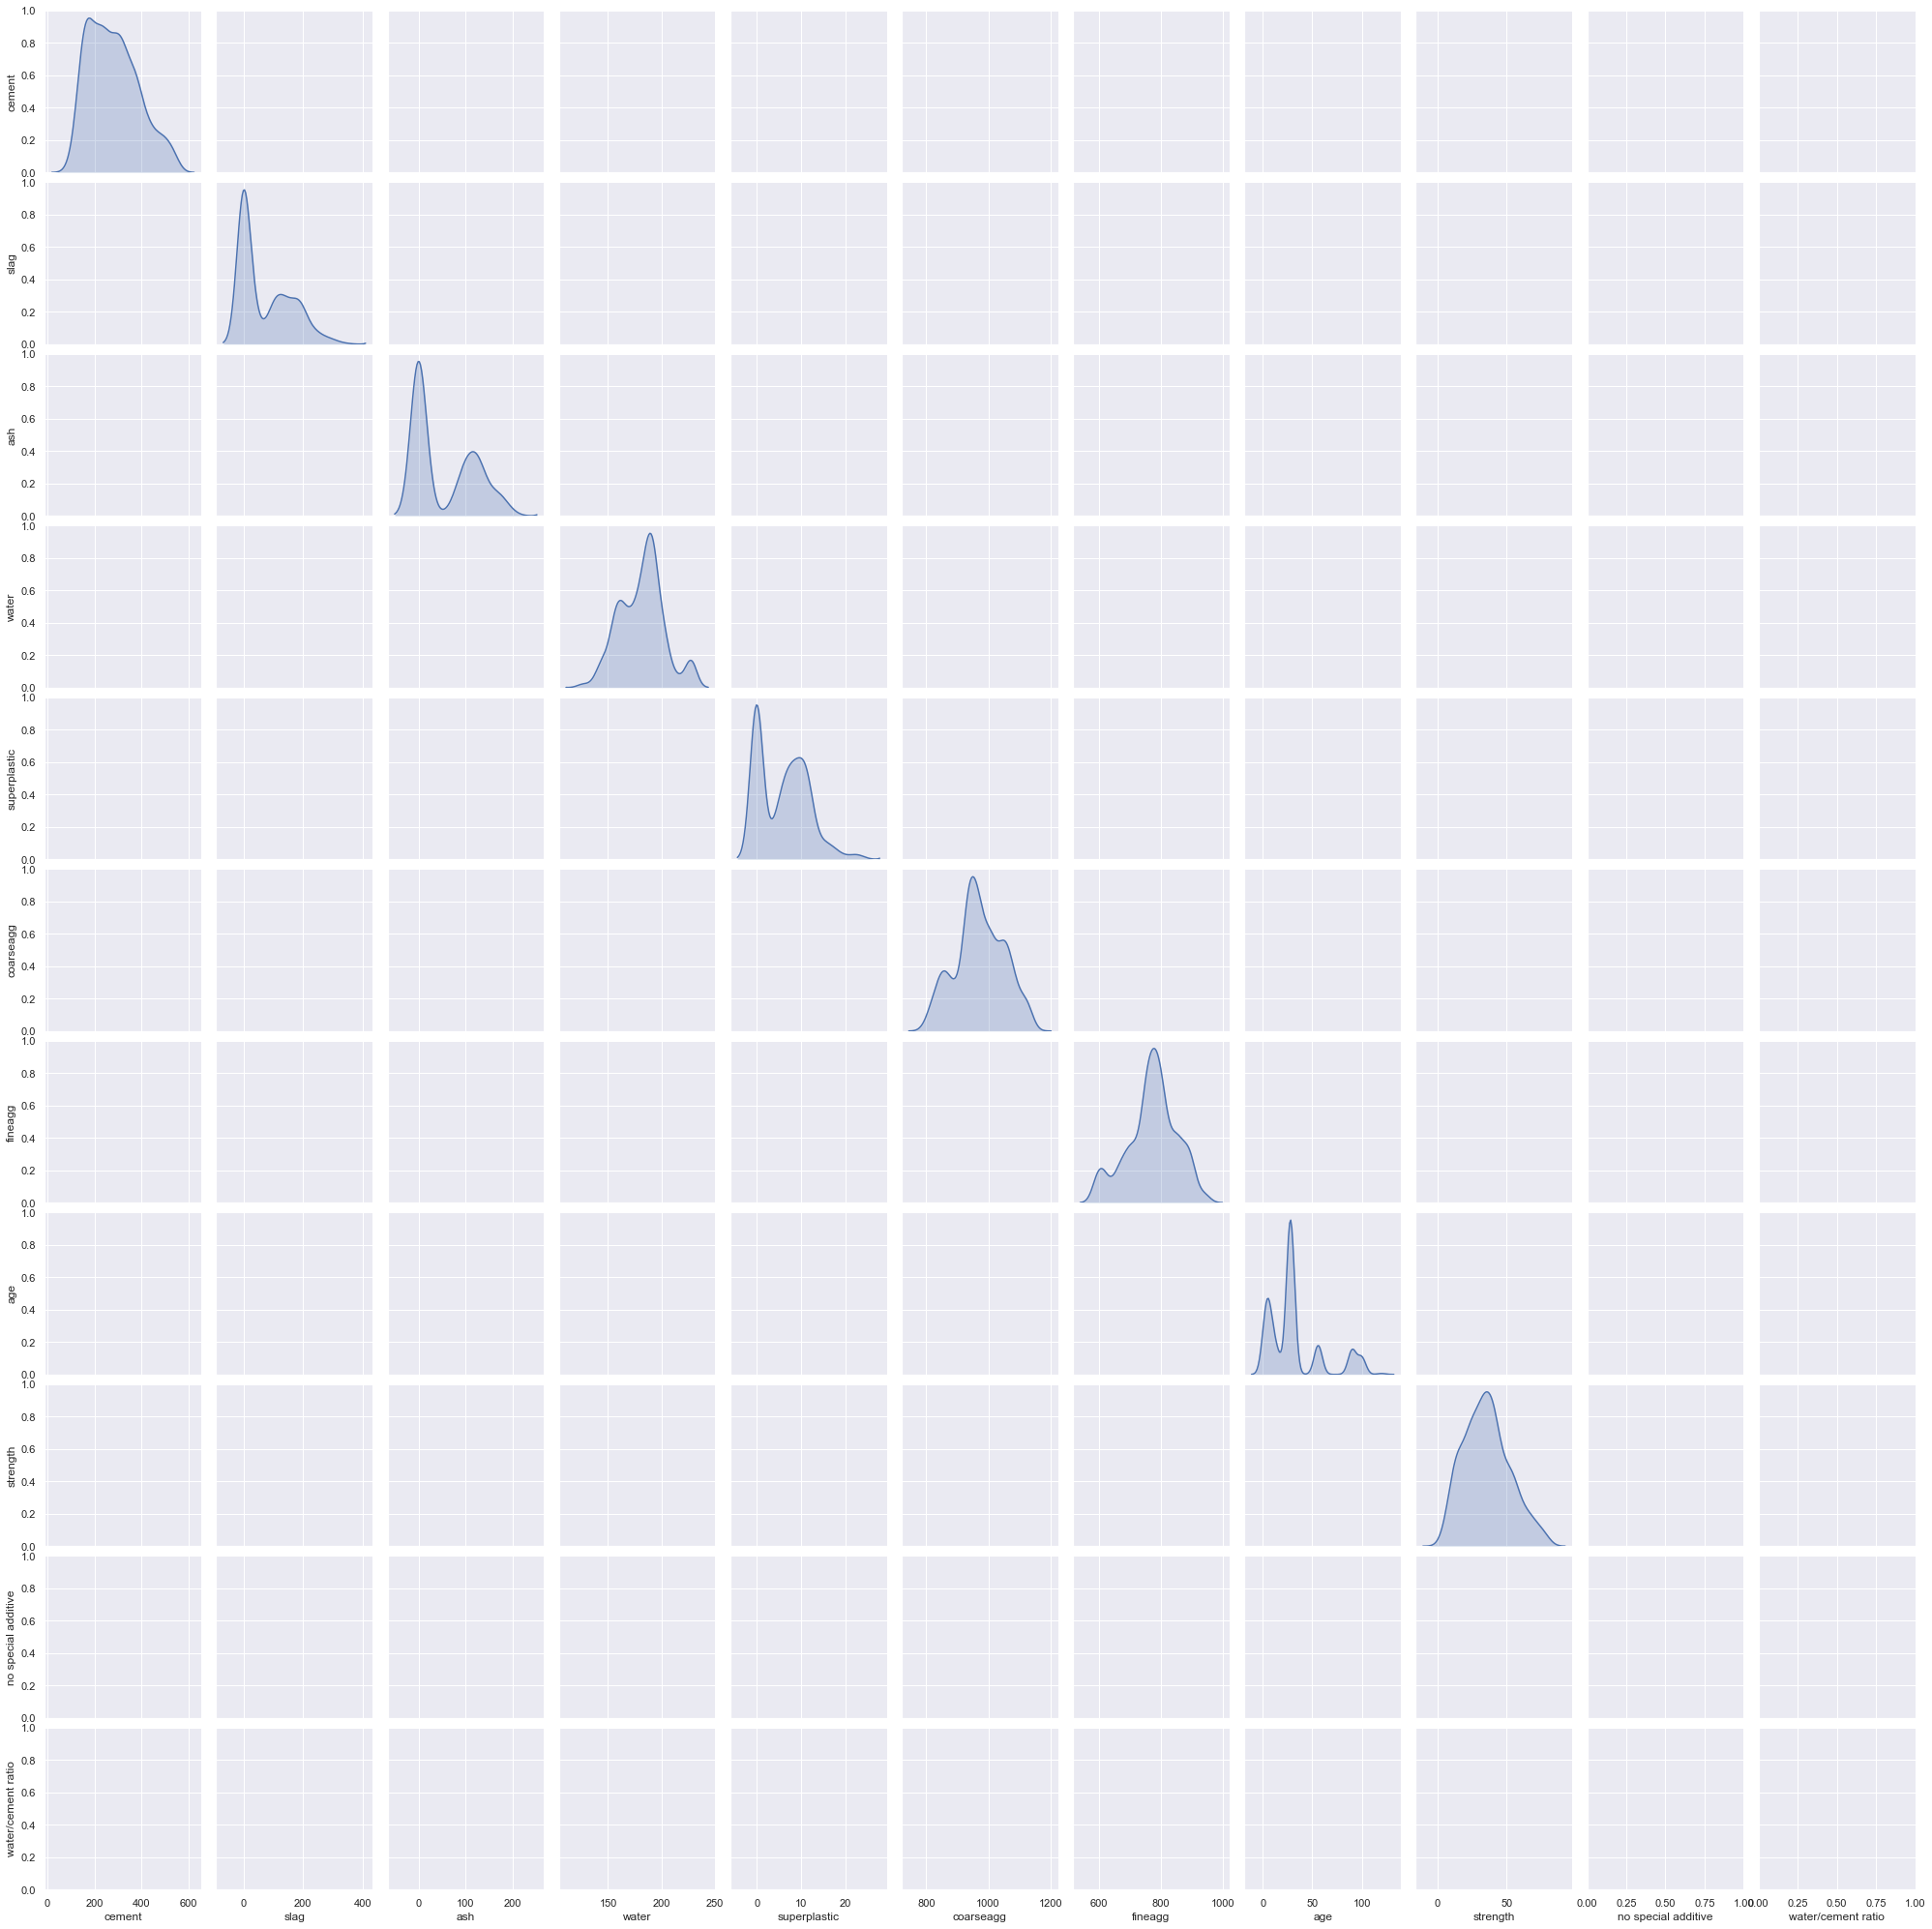

In [304]:
sns.pairplot(df_data_raw, diag_kind = 'kde', palette="husl")

# sns.pairplot(pima_df, hue="class", palette="husl")

Note:

Scatter plots

cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. <br>
slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. <br>
ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. <br>
water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. <br>
superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.<br>
coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes.<br>
fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes.<br>

Comment: none of the variable have a very strong linear correlation (strong correlation would make them candidates to be dropped).


Target column vs other independent attributes 

strength vs cement: It is linearly related to the cement. The relationship is positive - for a given value of cement there are multiple values of strength. This is a weak predictor.<br>
strength vs slag: There is no linear relationship. <br>
strength vs slag: There is no linear relationship. <br>
strength vs age: There is no linear relationship. <br>
strength vs superplastic: There is no linear relationship. <br>
No other attributes has a strong linear relationship with strength.<br>

Due to the fact that there are no strong linear relationships between the features and the target, a linear model will not produce good predictions. A higher degree model will be more suited.




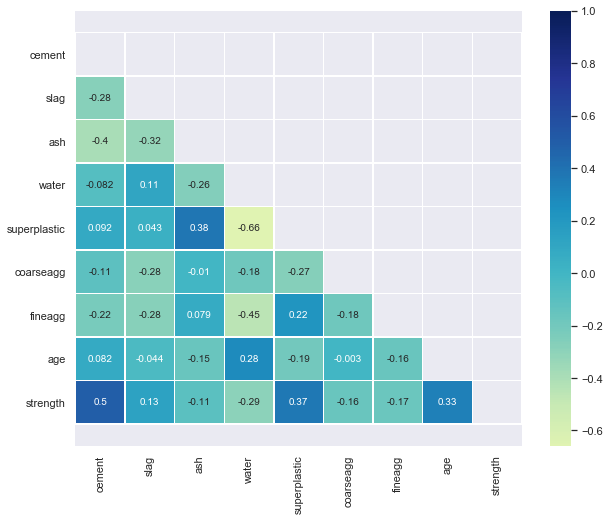

In [296]:
plt.figure(figsize=(10,8))

cor = df_data_raw.corr()
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(cor,
            annot=True,
            linewidths=.5,
            center=0,
            cmap="YlGnBu",
                mask = mask)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Notes:

Water shows relativly strong negative relationship with superplastic, fineagg and strength. 


#### Cemet and water effect on strength

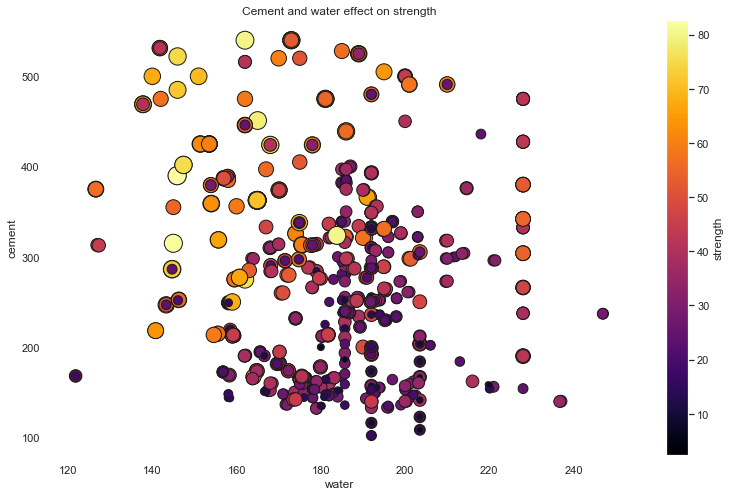

In [297]:
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(df_data_raw["water"],df_data_raw["cement"],
            c=df_data_raw["strength"],s=df_data_raw["strength"]*4,
            linewidth=1,edgecolor="k",cmap="inferno")
ax.set_facecolor("w")
ax.set_xlabel("water")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("strength")
plt.title("Cement and water effect on strength")
plt.grid(True,alpha=.3)
plt.show()

Note:

From this plot it looks like higher amounts of water and lower amounts of cement results in lower strength. A ratio of cement to water might be a good additional feature.

#### 3.	Strategies to address the different data challenges

In [298]:
#Check for outliers
print('Outliers - cement: ',df_data_raw[((df_data_raw.cement - df_data_raw.cement.mean()) / df_data_raw.cement.std()).abs() >3]['cement'].count())
print('Outliers - slag: ',df_data_raw[((df_data_raw.slag - df_data_raw.slag.mean()) / df_data_raw.slag.std()).abs() >3]['slag'].count())
print('Outliers - ash: ',df_data_raw[((df_data_raw.ash - df_data_raw.ash.mean()) / df_data_raw.ash.std()).abs() >3]['ash'].count())
print('Outliers - water: ',df_data_raw[((df_data_raw.water - df_data_raw.water.mean()) / df_data_raw.water.std()).abs() >3]['water'].count())
print('Outliers - superplastic: ',df_data_raw[((df_data_raw.superplastic - df_data_raw.superplastic.mean()) / df_data_raw.superplastic.std()).abs() >3]['superplastic'].count())
print('Outliers - coarseagg: ',df_data_raw[((df_data_raw.coarseagg - df_data_raw.coarseagg.mean()) / df_data_raw.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Outliers - fineagg: ',df_data_raw[((df_data_raw.fineagg - df_data_raw.fineagg.mean()) / df_data_raw.fineagg.std()).abs() >3]['fineagg'].count())
print('Outliers - age: ',df_data_raw[((df_data_raw.age - df_data_raw.age.mean()) / df_data_raw.age.std()).abs() >3]['age'].count())

Outliers - cement:  0
Outliers - slag:  4
Outliers - ash:  0
Outliers - water:  2
Outliers - superplastic:  10
Outliers - coarseagg:  0
Outliers - fineagg:  0
Outliers - age:  33


Note:

Standard deviation is used to detect outliers. Data points more than 3 times the standard deviation are defines as outliers.<br>
Outliers will be replaced with the median.

In [299]:
#Replacing the outliers by median
for col_name in df_data_raw.columns[:-1]:
    q1 = df_data_raw[col_name].quantile(0.25)
    q3 = df_data_raw[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    df_data_raw.loc[(df_data_raw[col_name] < low) | (df_data_raw[col_name] > high), col_name] = df_data_raw[col_name].median()

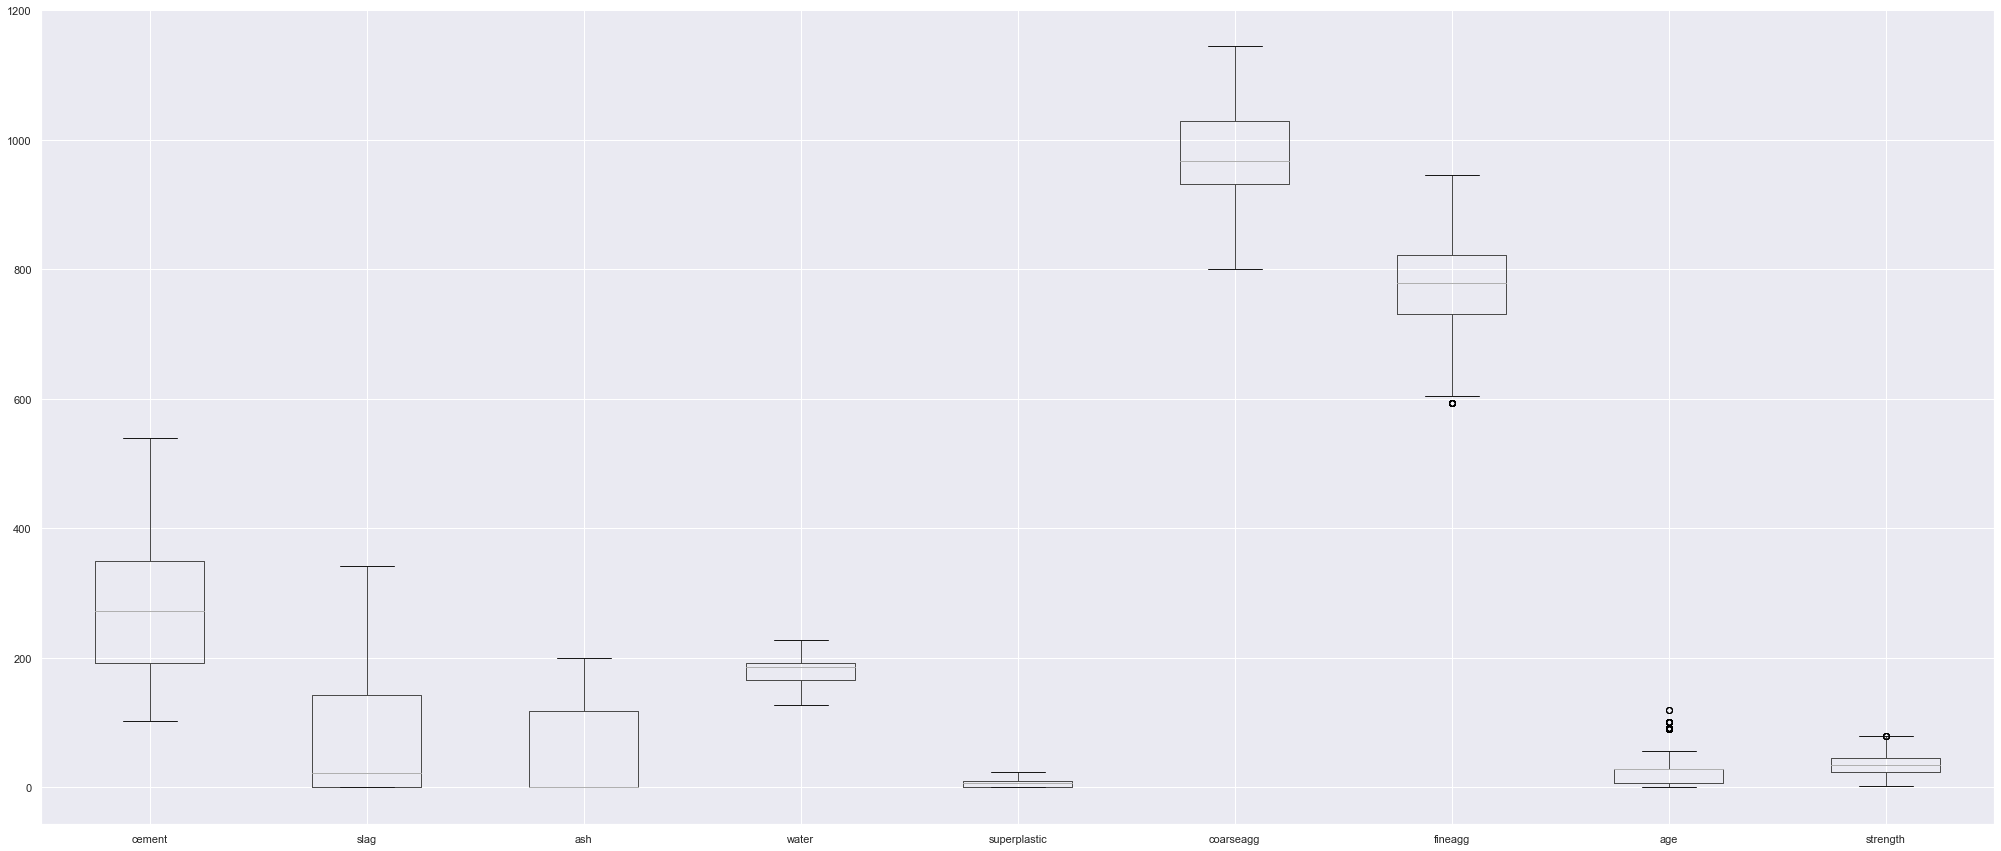

In [300]:
df_data_raw.boxplot(figsize=(35,15))

#### 4.	Feature engineering techniques

a.	Identify opportunities (if any) to create a composite feature, drop a feature

No features will be dropped.

From the distributions we can see that there is a large number of records that have no slag, no ash and no superplastic. We can make a custom feature indicating "no special additive".

In [301]:
x = lambda row: 1 if ((row['slag'] == 0) & (row['ash'] == 0) & (row['superplastic'] == 0))  else 0 
df_data_raw['no special additive'] = df_data_raw.apply(x, axis=1)

In [302]:
df_data_raw['no special additive'].value_counts()

0    821
1    209
Name: no special additive, dtype: int64

The ratio of cement to water will be added as an additional feature.

In [303]:
df_data_raw['water/cement ratio'] = df_data_raw['water']/df_data_raw['cement']

b.	Decide on complexity of the model

Due to the fact that there are no strong linear relationships between the features and the target, a linear model will not produce good predictions. A higher degree model will be more suited.

c.	Explore for Gaussians and comment on the distribution

Notes on the variable distributions:

cement: distribution close to normal.<br>
slag: three gausssians and rightly skewed.<br>
ash: two gaussians and rightly skewed.<br>
water: three guassians and slighly left skewed.<br>
superplastic: two gaussians and rightly skewed.<br>
coarseagg: three guassians and almost normal.<br>
fineagg: two guassians and looks like normal.<br>
age: multiple guassians and rightly skewed.<br>

###  Creating the model and tuning it

#### 4.	Create the training set and test set in ration of 70:30

In [198]:
df_data = df_data_raw.copy()
df_data_ohe = pd.get_dummies(df_data,drop_first=True)
df_data_y = df_data_ohe['strength']
df_data_x = df_data_ohe.drop('strength',axis=1)


In [199]:
df_data_x

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,no special additive,water/cement ratio,age_months_12 months,age_months_2 months,age_months_3 months,age_months_4 months,age_months_6 months,age_months_9 months
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,0,1.440198,0,0,0,0,0,0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,0,0.937241,0,0,0,0,0,0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,0,0.749600,0,0,0,0,0,0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,0,0.857143,0,0,0,0,0,0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,0,1.248708,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,0,1.333333,0,0,0,0,0,0
1026,531.3,0.0,0.0,141.8,6.4,852.1,893.7,3.0,0,0.266893,0,0,0,0,0,0
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,0,0.649783,0,0,0,0,0,0
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,28.0,0,0.666667,0,0,0,0,0,1


In [200]:
df_data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cement                1030 non-null   float64
 1   slag                  1030 non-null   float64
 2   ash                   1030 non-null   float64
 3   water                 1030 non-null   float64
 4   superplastic          1030 non-null   float64
 5   coarseagg             1030 non-null   float64
 6   fineagg               1030 non-null   float64
 7   age                   1030 non-null   float64
 8   no special additive   1030 non-null   int64  
 9   water/cement ratio    1030 non-null   float64
 10  age_months_12 months  1030 non-null   uint8  
 11  age_months_2 months   1030 non-null   uint8  
 12  age_months_3 months   1030 non-null   uint8  
 13  age_months_4 months   1030 non-null   uint8  
 14  age_months_6 months   1030 non-null   uint8  
 15  age_months_9 months  

In [201]:
x_train,x_test,y_train,y_test=train_test_split(df_data_x,df_data_y,test_size=0.3,random_state=1)



#### Decision Tree for initial test

In [202]:
# dtcl = DecisionTreeRegressor(random_state = 100,
#                              max_depth=3, 
#                              min_samples_leaf=5)
dtcl = DecisionTreeRegressor(random_state = 100)

dtcl.fit(x_train, y_train)
y_predict_DT = dtcl.predict(x_test)

# check for overfitting
y_predict_DT_train = dtcl.predict(x_train)

In [203]:
print('Performance on training data:',dtcl.score(x_train,y_train))
print('Performance on testing data:',dtcl.score(x_test,y_test))
acc_DT=metrics.r2_score(y_test, y_predict_DT)
print('Accuracy DT: ',acc_DT)
rmse_DT = np.sqrt(mean_squared_error(y_test, y_predict_DT))
print('RMSE DT: ',rmse_DT)

Performance on training data: 0.9946960426073854
Performance on testing data: 0.7920118468609787
Accuracy DT:  0.7920118468609787
RMSE DT:  7.685390108868543


Note: the model is overfit, since the accuracy on the training data is much higher than on the testing data.

C:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


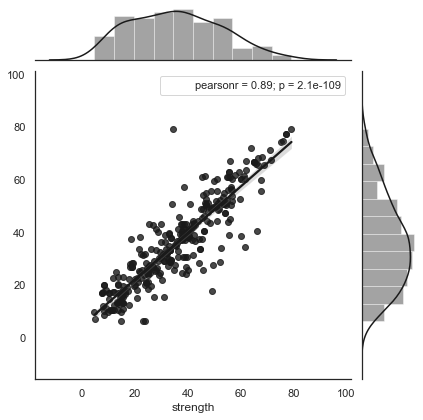

In [204]:

sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_predict_DT, stat_func=pearsonr,kind="reg", color="k");

In [205]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree (initial test - overfit)'],
                          'Accuracy (r2 score)': acc_DT,
                          'RMSE': rmse_DT,})
resultsDf

,Method,Accuracy (r2 score),RMSE
0,Decision Tree (initial test - overfit),0.792012,7.68539


In [206]:
dtcl_p = DecisionTreeRegressor(random_state = 100,
                             max_depth=5, 
                             min_samples_leaf=4)

dtcl_p.fit(x_train, y_train)
y_predict_DT_p = dtcl_p.predict(x_test)

# check for overfitting
y_predict_DT_train_p = dtcl_p.predict(x_train)

In [207]:
print('Performance on training data:',dtcl_p.score(x_train,y_train))
print('Performance on testing data:',dtcl_p.score(x_test,y_test))
acc_DT_p=metrics.r2_score(y_test, y_predict_DT_p)
print('Accuracy DT_p: ',acc_DT_p)
rmse_DT_p = np.sqrt(mean_squared_error(y_test, y_predict_DT_p))
print('RMSE DT_p: ',rmse_DT_p)

Performance on training data: 0.8131791328858354
Performance on testing data: 0.7151783899244156
Accuracy DT_p:  0.7151783899244156
RMSE DT_p:  8.993590027650585


Note: this model has a lower accuracy (and higher RMSE), but it is less overfit.

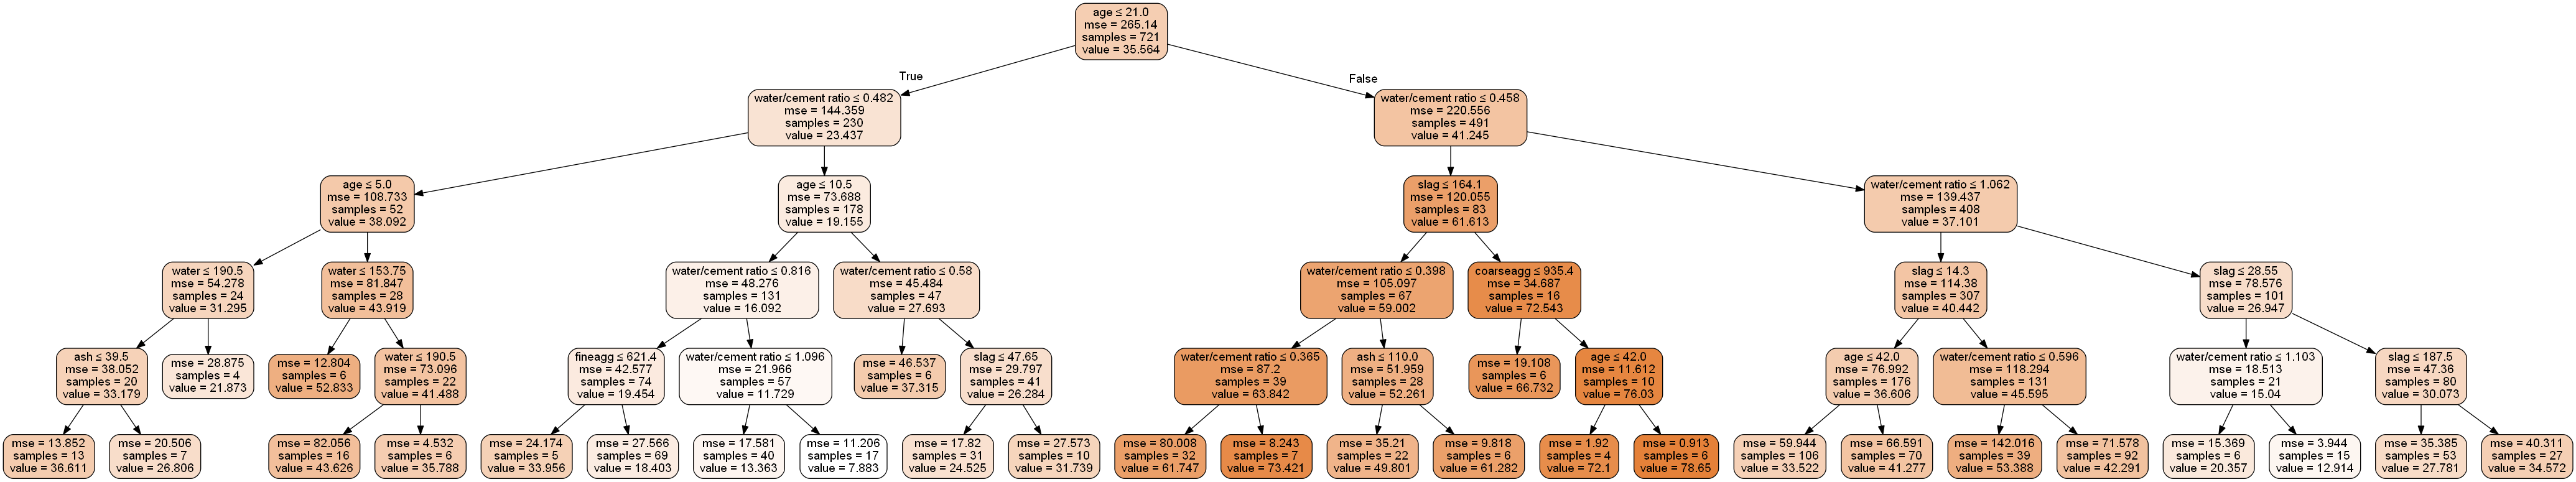

In [208]:
feature_cols = df_data_x.columns
dot_data = StringIO()
export_graphviz(dtcl_p, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

#### Use Random Forest

In [209]:
rfcl = RandomForestRegressor(n_estimators = 50,
                             max_depth=10, 
                             min_samples_leaf=4)
rfcl = rfcl.fit(x_train, y_train)
y_predict_RF = rfcl.predict(x_test)

In [210]:
print('Performance on training data:',rfcl.score(x_train,y_train))
print('Performance on testing data:',rfcl.score(x_test,y_test))
acc_RF=metrics.r2_score(y_test, y_predict_RF)
print('Accuracy DT: ',acc_RF)
rmse_RF = np.sqrt(mean_squared_error(y_test, y_predict_RF))
print('RMSE DT: ',rmse_RF)

Performance on training data: 0.9419863470926642
Performance on testing data: 0.8741257092812287
Accuracy DT:  0.8741257092812286
RMSE DT:  5.9788152833254875


In [211]:
tempResDf = pd.DataFrame({'Method':['Random forrest'],
                          'Accuracy (r2 score)': acc_RF,
                          'RMSE': rmse_RF,})

resultsDf1 = pd.concat([resultsDf, tempResDf])
resultsDf1

,Method,Accuracy (r2 score),RMSE
0,Decision Tree (initial test - overfit),0.792012,7.685390
0,Random forrest,0.874126,5.978815


Notes:
The Random Forrest model performes a bit better than the Decision Tree.

#### AdaBoost

In [212]:
abcl = AdaBoostRegressor(n_estimators=500, learning_rate=0.1, random_state=22)
abcl = abcl.fit(x_train, y_train)
y_predict_AB = abcl.predict(x_test)

In [213]:
print('Performance on training data:',abcl.score(x_train,y_train))
print('Performance on testing data:',abcl.score(x_test,y_test))
acc_AB=metrics.r2_score(y_test, y_predict_AB)
print('Accuracy DT: ',acc_AB)
rmse_AB = np.sqrt(mean_squared_error(y_test, y_predict_AB))
print('RMSE DT: ',rmse_AB)

Performance on training data: 0.7924818898358714
Performance on testing data: 0.7436294749242727
Accuracy DT:  0.7436294749242727
RMSE DT:  8.532585804019146


In [214]:
tempResDf = pd.DataFrame({'Method':['Adaboost'],
                          'Accuracy (r2 score)': acc_AB,
                          'RMSE': rmse_AB,})
resultsDf2 = pd.concat([resultsDf1, tempResDf])
resultsDf2

,Method,Accuracy (r2 score),RMSE
0,Decision Tree (initial test - overfit),0.792012,7.685390
0,Random forrest,0.874126,5.978815
0,Adaboost,0.743629,8.532586


#### Bagging classifier

In [215]:
bgcl = BaggingRegressor(n_estimators=500, max_samples=.7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(x_train, y_train)
y_predict_BC = bgcl.predict(x_test)

In [216]:
print('Performance on training data:',bgcl.score(x_train,y_train))
print('Performance on testing data:',bgcl.score(x_test,y_test))
acc_BC=metrics.r2_score(y_test, y_predict_BC)
print('Accuracy DT: ',acc_BC)
rmse_BC = np.sqrt(mean_squared_error(y_test, y_predict_BC))
print('RMSE DT: ',rmse_BC)

Performance on training data: 0.9692252384092143
Performance on testing data: 0.8815422243220258
Accuracy DT:  0.8815422243220259
RMSE DT:  5.800005488894693


In [217]:
tempResDf = pd.DataFrame({'Method':['Bagging classifier'],
                          'Accuracy (r2 score)': acc_BC,
                          'RMSE': rmse_BC,})
resultsDf3 = pd.concat([resultsDf2, tempResDf])
resultsDf3

,Method,Accuracy (r2 score),RMSE
0,Decision Tree (initial test - overfit),0.792012,7.685390
0,Random forrest,0.874126,5.978815
0,Adaboost,0.743629,8.532586
0,Bagging classifier,0.881542,5.800005


#### Gradient boosting

In [218]:
gbcl = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(x_train, y_train)
y_predict_GB = gbcl.predict(x_test)

In [219]:
print('Performance on training data:',gbcl.score(x_train,y_train))
print('Performance on testing data:',gbcl.score(x_test,y_test))
acc_GB=metrics.r2_score(y_test, y_predict_GB)
print('Accuracy DT: ',acc_GB)
rmse_GB = np.sqrt(mean_squared_error(y_test, y_predict_GB))
print('RMSE DT: ',rmse_GB)

Performance on training data: 0.989806678398627
Performance on testing data: 0.9032485130373246
Accuracy DT:  0.9032485130373246
RMSE DT:  5.241739597680098


In [220]:
tempResDf = pd.DataFrame({'Method':['Gradient boosting'],
                          'Accuracy (r2 score)': acc_GB,
                          'RMSE': rmse_GB,})
resultsDf4 = pd.concat([resultsDf3, tempResDf])
resultsDf4

,Method,Accuracy (r2 score),RMSE
0,Decision Tree (initial test - overfit),0.792012,7.685390
0,Random forrest,0.874126,5.978815
0,Adaboost,0.743629,8.532586
0,Bagging classifier,0.881542,5.800005
0,Gradient boosting,0.903249,5.241740


#### Light Gradient Boosting Machine

In [221]:
#  test Light Gradient Boosting Machine


lgbmcl = lgb.LGBMRegressor(boosting_type='gbdt',
                            n_estimators=1000,
                            learning_rate = 0.05, 
                            reg_alpha = 0.1, 
                            reg_lambda = 0.1, 
                            subsample = 0.8, 
                            n_jobs = -1, 
                            random_state = 50)

lgbmcl = lgbmcl.fit(x_train, y_train)
y_predict_LGBM = lgbmcl.predict(x_test)

In [222]:
print('Performance on training data:',lgbmcl.score(x_train,y_train))
print('Performance on testing data:',lgbmcl.score(x_test,y_test))
acc_LGBM=metrics.r2_score(y_test, y_predict_LGBM)
print('Accuracy DT: ',acc_LGBM)
rmse_LGBM = np.sqrt(mean_squared_error(y_test, y_predict_LGBM))
print('RMSE DT: ',rmse_LGBM)

Performance on training data: 0.9883563223883443
Performance on testing data: 0.9041762071488774
Accuracy DT:  0.9041762071488774
RMSE DT:  5.216549061532718


In [223]:
tempResDf = pd.DataFrame({'Method':['Light gradient boosting machine'],
                          'Accuracy (r2 score)': acc_LGBM,
                          'RMSE': rmse_LGBM,})
resultsDf5 = pd.concat([resultsDf4, tempResDf])
resultsDf5

,Method,Accuracy (r2 score),RMSE
0,Decision Tree (initial test - overfit),0.792012,7.685390
0,Random forrest,0.874126,5.978815
0,Adaboost,0.743629,8.532586
0,Bagging classifier,0.881542,5.800005
0,Gradient boosting,0.903249,5.241740
0,Light gradient boosting machine,0.904176,5.216549


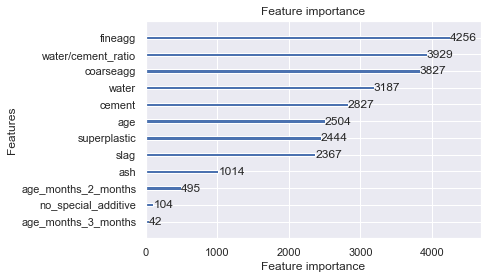

In [224]:
ax = lgb.plot_importance(lgbmcl)
plt.show()

Test LGBM with cross validation

In [225]:
cv = KFold(n_splits=8)
scores = model_selection.cross_val_score(lgbmcl, df_data_x, df_data_y, cv = cv)

In [226]:
scores

array([0.84390326, 0.93100075, 0.91812092, 0.89733489, 0.93615306,
       0.92955881, 0.91515276, 0.80378261])

In [227]:
accuracy=np.mean(abs(scores))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',scores.std())

Average accuracy:  0.8968758831443171
Standard Deviation:  0.04476806760195824


Making use of all available data to train the model results in an imporved average accuracy, with a standard deviation of 0.0419. This translates into an effective model accuracy of between 0.8481 and 0.9381.

In [228]:
tempResDf = pd.DataFrame({'Method':['Light gradient boosting machine (CV)'],
                          'Accuracy (r2 score)': accuracy,
                          'RMSE':'' })
resultsDf6 = pd.concat([resultsDf5, tempResDf])
resultsDf6

,Method,Accuracy (r2 score),RMSE
0,Decision Tree (initial test - overfit),0.792012,7.68539
0,Random forrest,0.874126,5.97882
0,Adaboost,0.743629,8.53259
0,Bagging classifier,0.881542,5.80001
0,Gradient boosting,0.903249,5.24174
0,Light gradient boosting machine,0.904176,5.21655
0,Light gradient boosting machine (CV),0.896876,


### Hyperparameter tuning

Select Light Gradient Boosting Machine as most promising algorithm. Use grid search to tune model parameters.

In [229]:
# params_dict={'boosting_type':['gbrt','random_forest','goss'],'n_estimators':[500,1000,1500], 'learning_rate':[0.01,0.05]}
params_dict={'n_estimators':[500,1000,1500], 'learning_rate':[0.01,0.05]}

clf_lgbmGS=GridSearchCV(estimator=LGBMRegressor( boosting_type='gbdt',
                                                reg_alpha = 0.1, 
                                                 reg_lambda = 0.1, 
                                                 subsample = 0.8, 
                                                 n_jobs = 1, 
                                                 random_state = 50),
                                                 param_grid=params_dict,
                                                 cv=10)

clf_lgbmGS.fit(df_data_x, df_data_y)

GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=1, num_leaves=31,
                                     objective=None, random_state=50,
                                     reg_alpha=0.1, reg_lambda=0.1, silent=True,
                                     subsample=0.8, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05],
                         'n_estimators': [500, 1000, 1500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [230]:
clf_lgbmGS.best_score_

0.9115647060603003

In [231]:
clf_lgbmGS.best_params_

{'learning_rate': 0.01, 'n_estimators': 1500}

In [232]:
tempResDf = pd.DataFrame({'Method':['Light gradient boosting machine (CV - HP tuning)'],
                          'Accuracy (r2 score)': clf_lgbmGS.best_score_,
                          'RMSE':'' })
resultsDf7 = pd.concat([resultsDf6, tempResDf])
resultsDf7

,Method,Accuracy (r2 score),RMSE
0,Decision Tree (initial test - overfit),0.792012,7.68539
0,Random forrest,0.874126,5.97882
0,Adaboost,0.743629,8.53259
0,Bagging classifier,0.881542,5.80001
0,Gradient boosting,0.903249,5.24174
0,Light gradient boosting machine,0.904176,5.21655
0,Light gradient boosting machine (CV),0.896876,
0,Light gradient boosting machine (CV - HP tuning),0.911565,


In [251]:
cols = list(df_data_ohe.columns.values) 
cols.pop(cols.index('strength')) 
df_data_ohe = df_data_ohe[cols+['strength']]
df_data_ohe

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,no special additive,water/cement ratio,age_months_12 months,age_months_2 months,age_months_3 months,age_months_4 months,age_months_6 months,age_months_9 months,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,0,1.440198,0,0,0,0,0,0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,0,0.937241,0,0,0,0,0,0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,0,0.749600,0,0,0,0,0,0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,0,0.857143,0,0,0,0,0,0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,0,1.248708,0,0,0,0,0,0,18.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,0,1.333333,0,0,0,0,0,0,13.29
1026,531.3,0.0,0.0,141.8,6.4,852.1,893.7,3.0,0,0.266893,0,0,0,0,0,0,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,0,0.649783,0,0,0,0,0,0,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,28.0,0,0.666667,0,0,0,0,0,1,55.06


Test the 95% confidence interval for the LGBM model, making use of bootstarp sampling

In [256]:
# configure bootstrap
n_iterations = 500              # Number of bootstrap samples to create
n_size = int(len(df_data_ohe) * 0.60)    # picking only 60 % of the given data in every bootstrap sample

values = df_data_ohe.values


# run bootstrap
stats = list()
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
    model = lgb.LGBMRegressor(boosting_type='gbdt',
                            n_estimators=1500,
                            learning_rate = 0.01, 
                            reg_alpha = 0.1, 
                            reg_lambda = 0.1, 
                            subsample = 0.8, 
                            n_jobs = -1, 
                            random_state = 50)
    
    train_x = train[:,:-1]
    train_y = train[:,-1]
    
    model.fit(train_x, train_y)
    
    # evaluate model
    test_x = test[:,:-1]  
    test_y = test[:,-1]
      
    
    
    predictions = model.predict(test_x)
    score = metrics.r2_score(test_y, predictions)    
    print(score)
    stats.append(score)

0.882012735104042
0.8833508443095526
0.8800618275335713
0.880734861857398
0.8728485532015837
0.881969126590536
0.8647446406043457
0.880332462622847
0.8807852247875726
0.8651228781962085
0.8770435300337153
0.8779317190495509
0.876253962884266
0.8727705793918257
0.8678644904257719
0.8515774910974413
0.8538509131205393
0.8743830607217041
0.8652071338999104
0.859775945953313
0.8610402265331214
0.8562702581985213
0.8703527160538425
0.8552294645798079
0.8598624699391246
0.8820106551447189
0.8906823067184512
0.8766544259473009
0.8640319975308666
0.8570250118894195
0.8606168878169855
0.9021290741116127
0.8934055939098178
0.8798874543363419
0.8593686526993283
0.8678390351246844
0.8422551523069689
0.8603814150899232
0.8578808194890417
0.8703004848693029
0.8634666328568378
0.8752051829722068
0.8735682176779229
0.8547533540570086
0.8671098880610659
0.8915923805103462
0.8642265107196756
0.8819082624620946
0.8687861560033341
0.8512679152332057
0.8958912381617232
0.8688908800322536
0.8851331289755727

0.8748929971434256
0.8492712027280604
0.8876784919451961
0.8750052049232042
0.872462724603331
0.8595736190107286
0.8839007888297125
0.881435675828839
0.8638647725783336
0.8522448568850058
0.8849318219461608
0.8646943109825547
0.8495162061488086
0.8489112857709795
0.8658439113165286
0.8574958951763012
0.8587712691602722
0.874007175714715
0.8535443077452879
0.8731904828092982
0.8806092218254896
0.8693848965370505
0.879859302778811
0.8733218964587919
0.8788879658437936
0.8791915481719348
0.8661539448304496
0.8761485737668444
0.8807986181870865
0.8627789811952772
0.890998426879361
0.869802058508241
0.8855630274219496
0.8875513850161451
0.8899722815068508
0.8789356894675843
0.8731937815803228
0.8623435724518824
0.8731919679306355
0.8420612324852182
0.8662264670165777
0.8758199955214435
0.8720545035133527
0.8725488982204068
0.8873409521819061
0.8851916890256523
0.8914291053723568
0.874823994477673
0.8764270242355064
0.8907203589914252
0.8662297096699209
0.8615815640834211
0.8756308653730154


95.0 confidence interval 84.7% and 89.4%


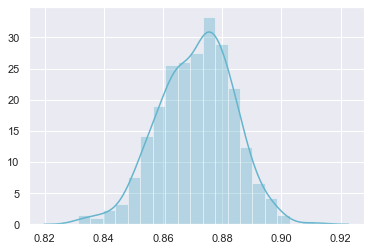

In [264]:
# plot scores
# pyplot.hist(score)
# pyplot.show()

ax = sns.distplot(stats,color=k)
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))